# 新段落

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [69]:
cpy = pd.read_csv('/content/Company.csv')
cpy_tweet = pd.read_csv('/content/Company_Tweet.csv')
tweet = pd.read_csv('/content/Tweet.csv')

In [5]:
cpy

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [6]:
cpy_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [7]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [8]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [9]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [10]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [11]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [13]:
tweets = tweets.loc[(tweets['date'] >= '2019-01-01')
                     & (tweets['date'] < '2019-12-31')]

In [14]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,2019-01-01
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,GOOGL,2019-01-01
3431136,1079890627335213057,traderDanielle,2019-01-01 00:02:43,Rinse and repeat - looking for entries in $XLC...,0,0,3,GOOGL,2019-01-01
3431137,1079890718326431745,O__rust,2019-01-01 00:03:05,$3750 would be the minimum discount in any cas...,0,0,0,TSLA,2019-01-01
3431138,1079890782742503424,GunGermSteel,2019-01-01 00:03:20,There are FUDking analysts like those from gol...,0,0,1,TSLA,2019-01-01
...,...,...,...,...,...,...,...,...,...
4333774,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,GOOGL,2019-12-30
4333775,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,MSFT,2019-12-30
4333776,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,TSLA,2019-12-30
4333777,1211799054289711106,GlobalMacroZen,2019-12-30 23:59:43,"Yeah, A guy who goes to Chili's ; likes the fo...",0,0,0,TSLA,2019-12-30


In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902645 entries, 3431134 to 4333778
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       902645 non-null  int64         
 1   writer         889051 non-null  object        
 2   post_date      902645 non-null  datetime64[ns]
 3   body           902645 non-null  object        
 4   comment_num    902645 non-null  int64         
 5   retweet_num    902645 non-null  int64         
 6   like_num       902645 non-null  int64         
 7   ticker_symbol  902645 non-null  object        
 8   date           902645 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 68.9+ MB


In [16]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [17]:
tweets.isna().sum()

writer           13594
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [18]:
tweets.ticker_symbol.value_counts()

TSLA     379058
AAPL     216329
AMZN     142965
MSFT      63809
GOOGL     59618
GOOG      40866
Name: ticker_symbol, dtype: int64

In [19]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [20]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [21]:
import yfinance as yf

In [22]:
tsla_stock = yf.Ticker('TSLA')

In [23]:
start = min(tsla['date'])
end = max(tsla['date'])

tsla_stock = tsla_stock.history(start=start.date(), end=end.date())

In [24]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0,0
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0,0
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0,0
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0,0
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0,0
...,...,...,...,...,...,...,...
2019-12-20 00:00:00-05:00,27.352667,27.533333,26.679333,27.039333,221290500,0,0
2019-12-23 00:00:00-05:00,27.452000,28.134001,27.333332,27.948000,199794000,0,0
2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,120820500,0,0


In [31]:
tsla_stock["date"] = tsla_stock.index

In [32]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [33]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-3).dropna() 
    stock_data = stocks['Volume'].dropna()
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title)
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-33-80e4ad6963a3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


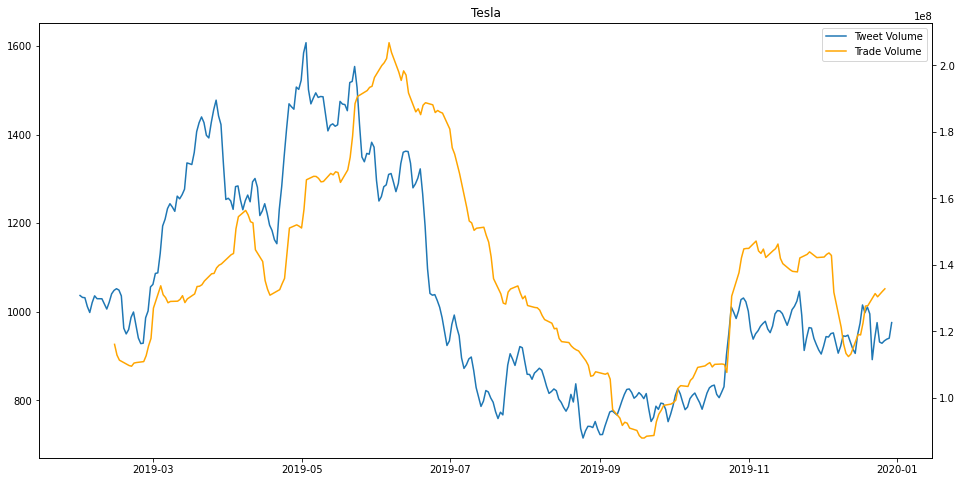

In [34]:
tweet_vol_affect(tsla,tsla_stock,"Tesla")    

<ipython-input-33-80e4ad6963a3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


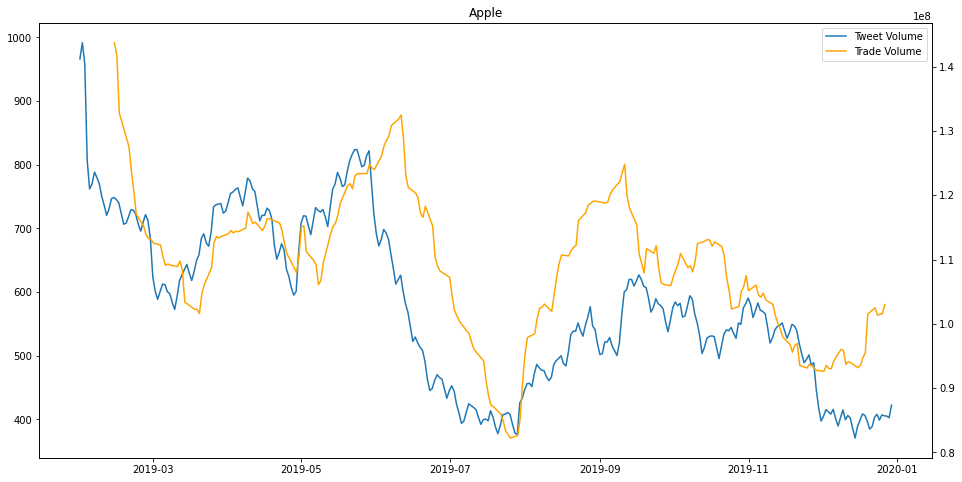

In [35]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

<ipython-input-33-80e4ad6963a3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


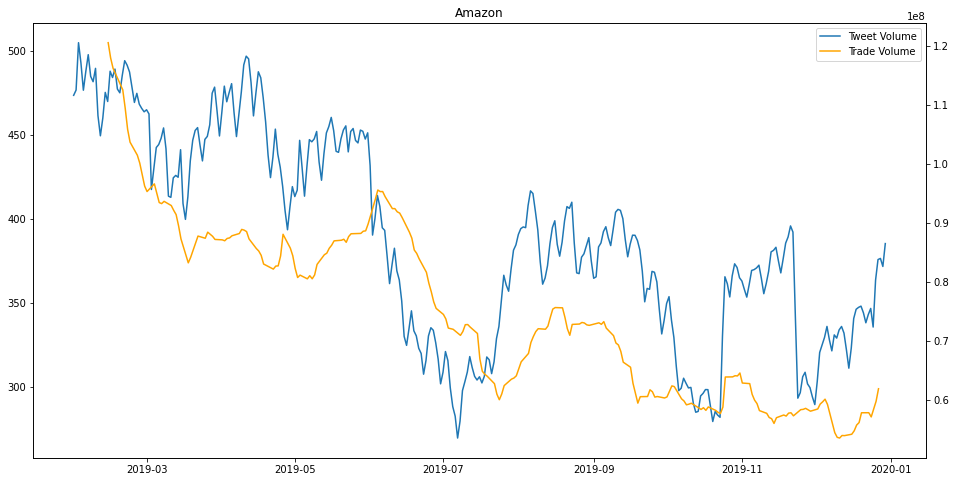

In [36]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

<ipython-input-33-80e4ad6963a3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


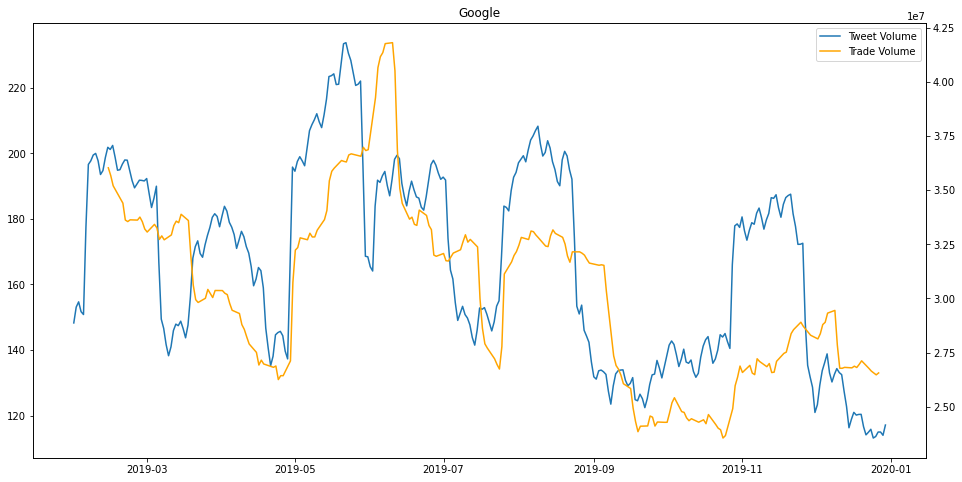

In [37]:
tweet_vol_affect(googl,googl_stock,"Google")

<ipython-input-33-80e4ad6963a3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


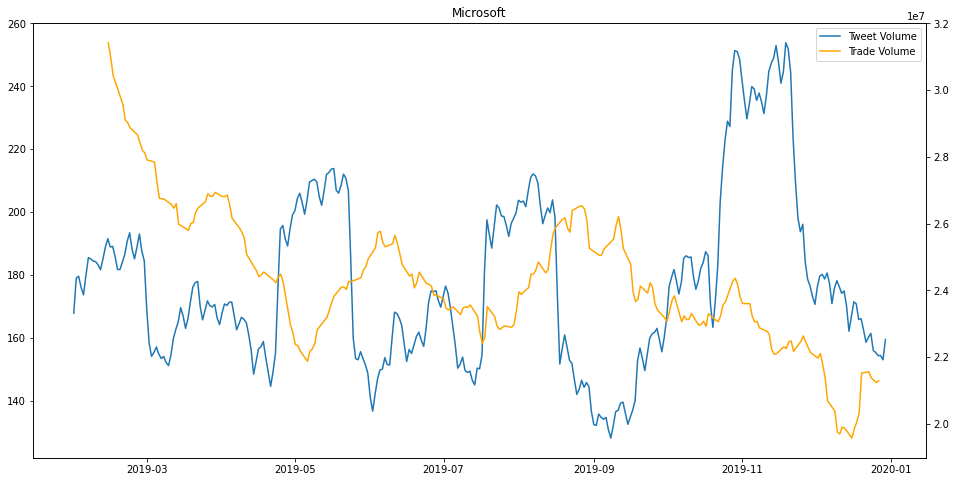

In [38]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

Classifying positive and negative tweets¶

In [39]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=4234c54114666a507f17ce956d41150d8fa4df4bd4b7cce718f3d7862018f209
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [40]:
from afinn import Afinn
afinn = Afinn()

In [64]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-64-0493c20c1d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-64-0493c20c1d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-64-0493c20c1d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [72]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-72-eebb8e012188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))


In [70]:
aapl

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,score
3431146,NaN,2019-01-01 00:12:41,#In2019 I plan to mock the #TrumpTrain relentl...,0,0,0,AAPL,2019-01-01,-9.0
3431147,MacHashNews,2019-01-01 00:13:07,How to upload photos into iCloud Photos from i...,0,0,0,AAPL,2019-01-01,0.0
3431150,permabear_uk,2019-01-01 00:20:55,"$AAPL settled +1.0% at $157.74, and that made ...",0,0,5,AAPL,2019-01-01,-2.0
3431151,AlpacaAlerts,2019-01-01 00:21:01,$AAPL is in Parabolic SAR Breakout winning 60....,0,0,0,AAPL,2019-01-01,4.0
3431156,SunDog8259,2019-01-01 00:24:47,Join @RobinhoodApp and we'll both get a stock ...,0,0,1,AAPL,2019-01-01,4.0
...,...,...,...,...,...,...,...,...,...
4333764,artman1033,2019-12-30 23:50:30,$AAPL ALL TIME HIGH! $293.97 All Time Highest ...,0,1,0,AAPL,2019-12-30,1.0
4333765,Sandro_power,2019-12-30 23:52:35,$AAPL has been a great win for us all year lik...,14,34,37,AAPL,2019-12-30,15.0
4333767,sonycomeback,2019-12-30 23:53:35,The most undervalued global company and brand ...,0,0,0,AAPL,2019-12-30,0.0
4333770,QContrarian,2019-12-30 23:55:37,Discussion of $AAPL and $FB both of which have...,0,0,0,AAPL,2019-12-30,-2.0


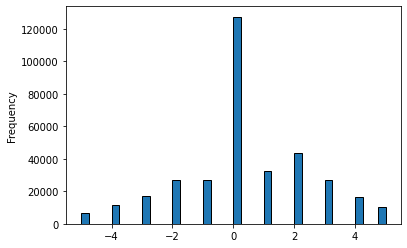

In [74]:
tsla.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [75]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0,0,2019-01-02 00:00:00-05:00
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0,0,2019-01-03 00:00:00-05:00
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0,0,2019-01-04 00:00:00-05:00
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0,0,2019-01-07 00:00:00-05:00
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0,0,2019-01-08 00:00:00-05:00
...,...,...,...,...,...,...,...,...
2019-12-20 00:00:00-05:00,27.352667,27.533333,26.679333,27.039333,221290500,0,0,2019-12-20 00:00:00-05:00
2019-12-23 00:00:00-05:00,27.452000,28.134001,27.333332,27.948000,199794000,0,0,2019-12-23 00:00:00-05:00
2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,120820500,0,0,2019-12-24 00:00:00-05:00


In [79]:
tsla_stock.index = tsla_stock.index.tz_localize(tsla_stock.index.tz)
# merge the two DataFrames using their indices
tsla_score = pd.merge(tsla_stock, tsla, left_index=True, right_index=True)

In [81]:
tsla_score.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,comment_num,retweet_num,like_num,score
count,313456.000000,313456.000000,313456.000000,313456.000000,3.134560e+05,313456.0,313456.0,313456.000000,313456.000000,313456.000000,313456.000000
mean,18.150589,18.468029,17.821099,18.163992,1.623401e+08,0.0,0.0,1.018778,1.264895,8.784678,0.332251
std,3.402262,3.462166,3.395056,3.465641,8.779286e+07,0.0,0.0,4.381971,8.162254,33.643871,3.079475
min,12.073333,12.445333,11.799333,11.931333,3.698400e+07,0.0,0.0,0.000000,0.000000,0.000000,-99.000000
25%,15.457333,15.696667,15.200000,15.535333,1.006710e+08,0.0,0.0,0.000000,0.000000,0.000000,-1.000000
50%,17.590000,17.978666,17.372667,17.658667,1.336380e+08,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,20.406668,20.850000,19.933332,20.525333,1.955745e+08,0.0,0.0,1.000000,1.000000,5.000000,2.000000
max,29.000000,29.020666,28.423332,28.729334,4.500915e+08,0.0,0.0,567.000000,886.000000,987.000000,47.000000


In [83]:
tsla_score = tsla_score[["Close", "date", "score"]]

In [89]:
tsla_score = tsla_score.groupby('date').mean('score')


In [90]:
tsla_score

,Close,score,diff
date,,,
2019-01-02 00:00:00-05:00,20.674667,0.302676,0.000000
2019-01-03 00:00:00-05:00,20.024000,0.231504,0.000000
2019-01-04 00:00:00-05:00,21.179333,0.437093,0.001085
2019-01-07 00:00:00-05:00,22.330667,0.395786,0.000752
2019-01-08 00:00:00-05:00,22.356667,0.389442,0.000996
...,...,...,...
2019-12-20 00:00:00-05:00,27.039333,0.732017,0.000705
2019-12-23 00:00:00-05:00,27.948000,1.000000,0.000393
2019-12-24 00:00:00-05:00,28.350000,0.942368,0.000779


In [91]:
# create an empty list to store the labels
labels = []

# iterate over the stock prices
for i, price in enumerate(tsla_score['Close']):
  # if the current price is greater than the previous price, label it as 1
  if i > 0 and price > tsla_score['Close'][i-1]:
    labels.append(1)
  else:
    labels.append(0)

# add the labels to the DataFrame
tsla_score['diff'] = labels

# print the DataFrame
print(tsla_score)

                               Close     score  diff
date                                                
2019-01-02 00:00:00-05:00  20.674667  0.302676     0
2019-01-03 00:00:00-05:00  20.024000  0.231504     0
2019-01-04 00:00:00-05:00  21.179333  0.437093     1
2019-01-07 00:00:00-05:00  22.330667  0.395786     1
2019-01-08 00:00:00-05:00  22.356667  0.389442     1
...                              ...       ...   ...
2019-12-20 00:00:00-05:00  27.039333  0.732017     1
2019-12-23 00:00:00-05:00  27.948000  1.000000     1
2019-12-24 00:00:00-05:00  28.350000  0.942368     1
2019-12-26 00:00:00-05:00  28.729334  0.683110     1
2019-12-27 00:00:00-05:00  28.691999  0.593870     0

[250 rows x 3 columns]


In [59]:
tsla

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,score
date,,,,,,,,
2019-01-01,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,-1.0
2019-01-01,O__rust,2019-01-01 00:03:05,$3750 would be the minimum discount in any cas...,0,0,0,TSLA,2.0
2019-01-01,GunGermSteel,2019-01-01 00:03:20,There are FUDking analysts like those from gol...,0,0,1,TSLA,2.0
2019-01-01,ruskitrader,2019-01-01 00:04:35,I really hope they report ‘unbelievable’ numbe...,0,0,3,TSLA,1.0
2019-01-01,Path_Trading,2019-01-01 00:07:33,#TESLA : $TSLA Dec-31 Update #StockMarket #Tec...,0,0,0,TSLA,0.0
...,...,...,...,...,...,...,...,...
2019-12-30,MrR17941987,2019-12-30 23:43:14,"Dumb question, is this enough people to run a ...",0,1,7,TSLA,-3.0
2019-12-30,_TeslaTom,2019-12-30 23:55:13,Thanks Mate!Haha that’d be $TSLA style growth,0,0,2,TSLA,7.0
2019-12-30,maythefroth,2019-12-30 23:58:54,$TSLA: Tesla has a deadly unintended accelerat...,0,0,0,TSLA,-5.0


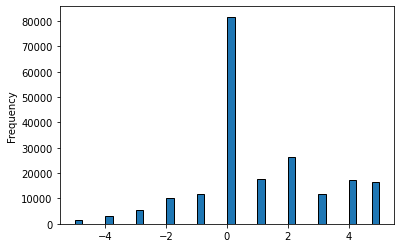

In [ ]:
aapl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

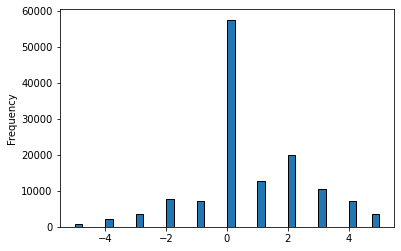

In [ ]:
amzn.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

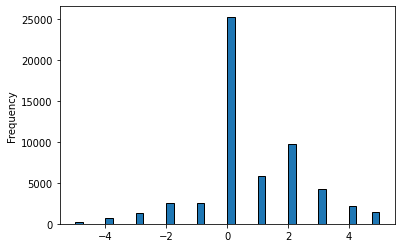

In [ ]:
googl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

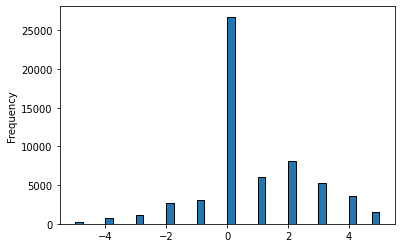

In [ ]:
msft.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [ ]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('date')['score'].mean().shift(-3).rolling(30).mean().dropna()

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-77-53651a14b2d1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


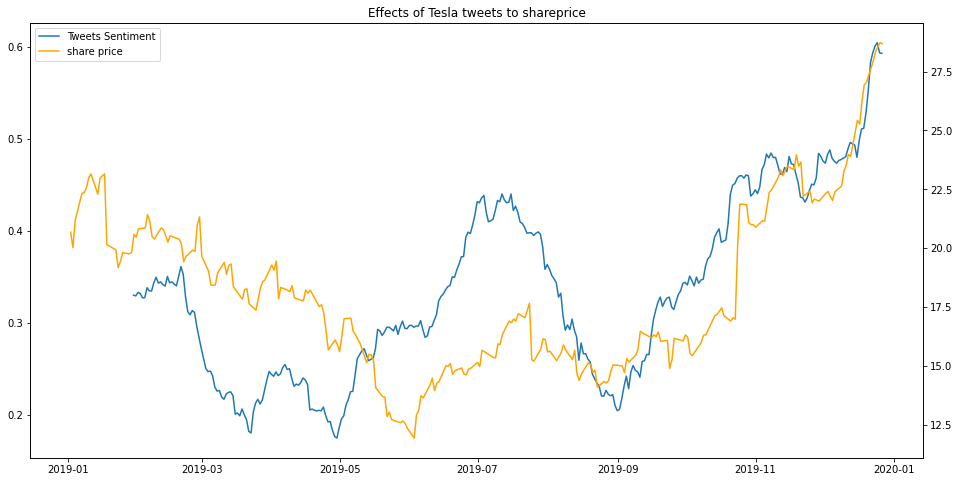

In [ ]:
sentiment_overtime(tsla,tsla_stock,"Tesla");

<ipython-input-77-53651a14b2d1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


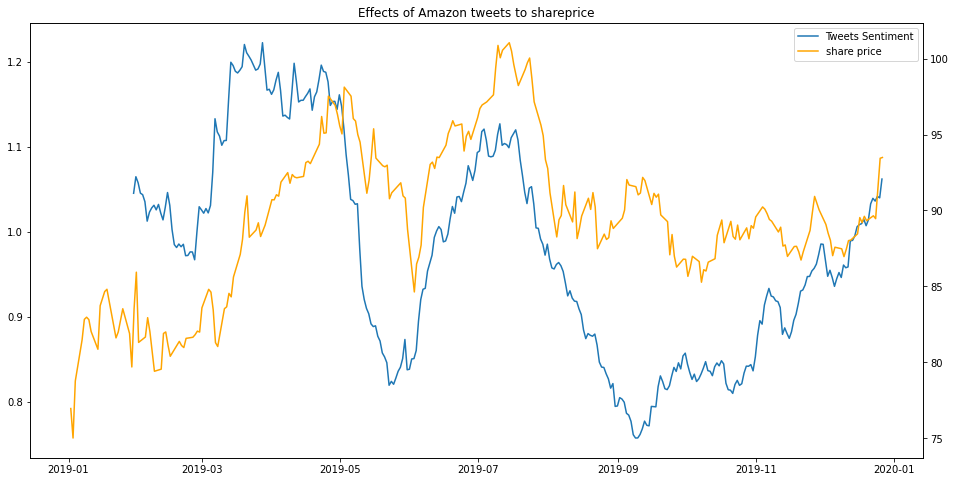

In [ ]:
sentiment_overtime(amzn,amzn_stock,"Amazon");

<ipython-input-77-53651a14b2d1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


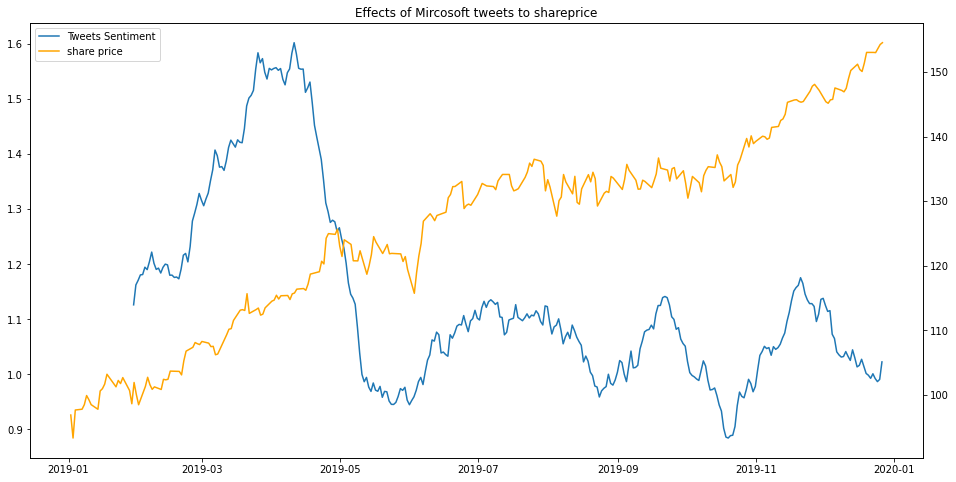

In [ ]:
sentiment_overtime(msft,msft_stock,"Mircosoft");

<ipython-input-77-53651a14b2d1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


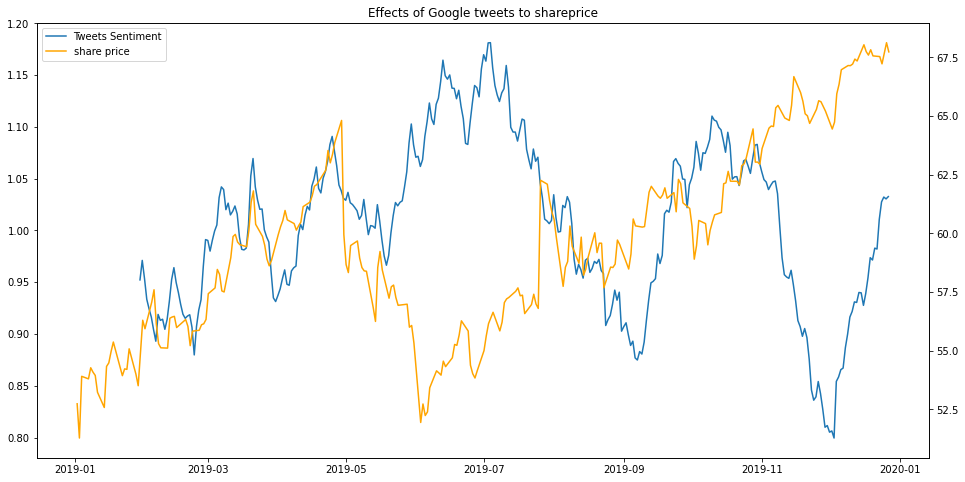

In [ ]:
sentiment_overtime(googl,googl_stock,"Google");

<ipython-input-77-53651a14b2d1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


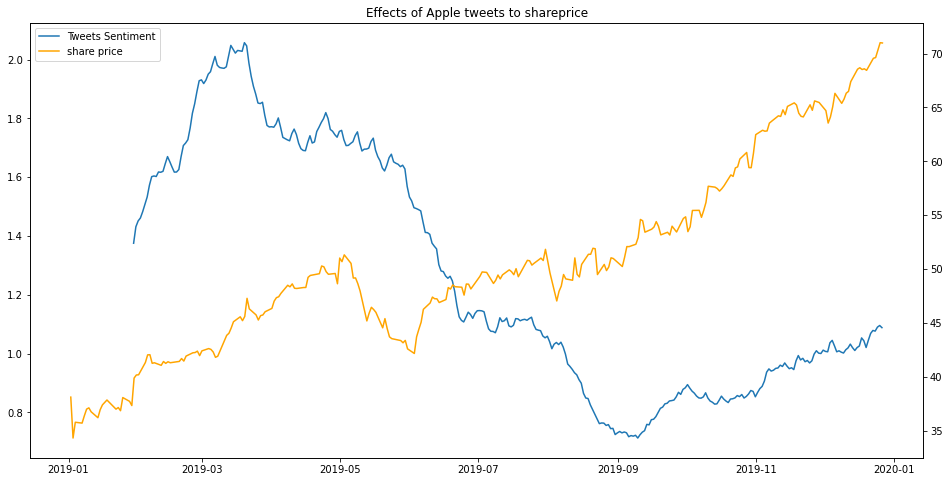

In [ ]:
sentiment_overtime(aapl,aapl_stock,"Apple");

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split the data into training and test sets
X = tsla_score[['Close']]
y = tsla_score['diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train a random forest classifier on the training set
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make predictions on the test set
predictions = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(accuracy)

0.5466666666666666
